<a href="https://colab.research.google.com/github/codevalley9/Game-of-Thrones/blob/main/game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Задание 1.1.
Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Задание 1.2.
Загрузите датасет в Pandas DataFrame при помощи функции read_csv. Вместо дефолтных наименований строк 0,1,..., при помощи параметра index_col, сделайте значения колонки S.No наименованиями строк:

In [2]:
data = pd.read_csv('https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v', index_col="S.No")

In [3]:
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


#### Задание 1.3.
Предобработка (очистка) данных.
Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

Cуммируем по оси 0, чтобы узнать количество пропущенных значений в каждом из столбцов:

In [4]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


Для красоты и удобства можно визуализировать количество пропущенных значений следующим способом:

<BarContainer object of 25 artists>

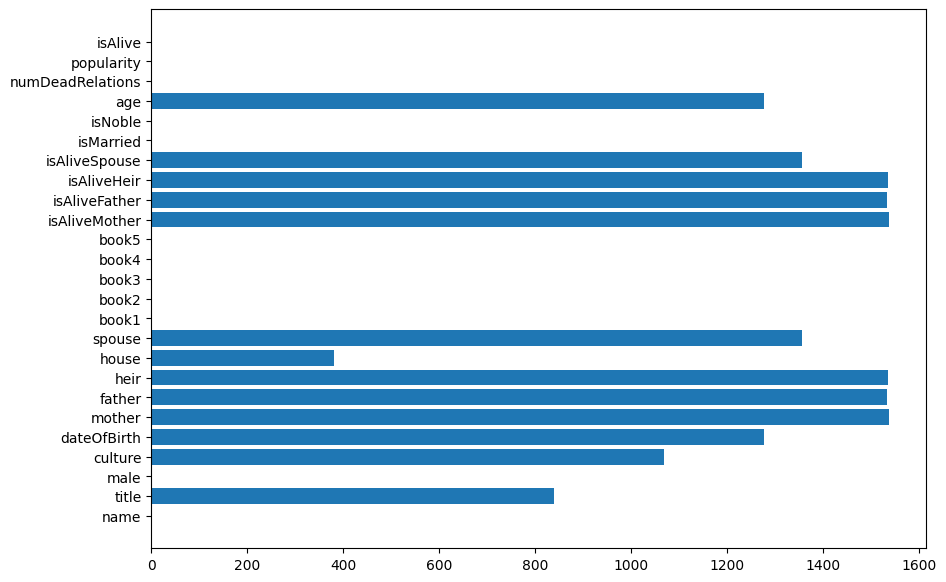

In [5]:
df = data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(df.index, df.values)

У колонок 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir' заполненность ~1%, если они не влияют на выживаемость, можно будет их убрать. В реальности наличие живых родственников может повлиять на выживаемость, пока возьмем на заметку.
Возраст скорее всего важен, я бы заполнила его медианой, чтобы это поле было приближено к более типичному возрасту всех персонажей.

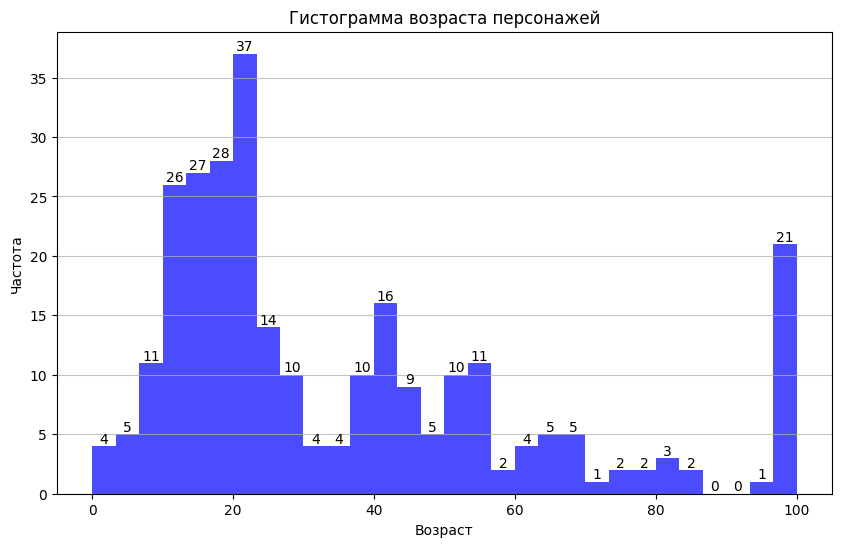

In [6]:
# Построение гистограммы для колонки 'age'
plt.figure(figsize=(10, 6))  # Установка размера графика
counts, bins, patches = plt.hist(data['age'].dropna(), bins=30, color='blue', alpha=0.7)  # dropna() убирает NaN значения

# Добавление значения частоты над каждым столбцом
for count, x in zip(counts, bins):
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.title('Гистограмма возраста персонажей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)  # Сетка по оси Y
plt.show()

In [7]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 35.29032258064516
Медиана = 24.0


Нарисуем распределение признака Age с его средним и медианой:

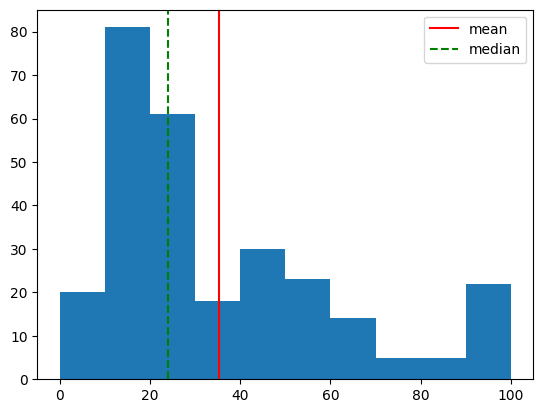

In [8]:
plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')
plt.legend(['mean', 'median'], loc='upper right')
plt.show()

Так как распределение признаков ассиметрично, лучше ориентироваться на моду или медиану.

Для числовых признаков часто используется медиана, для категориальных — мода. Возраст - числовой признак, поэтому заполним недостающие значения медианой.

In [9]:
# Заполнение нулевых значений медианой с использованием loc
data.loc[data['age'].isnull(), 'age'] = median_Age

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

#### Задание 1.4. Создайте новые признаки.

Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
Упростите признак culture, объединив схожие названия в один.

In [11]:
# создаем признак isPopular
data.loc[data["popularity"] > 0.5, ["isPopular"]] = 1
data.loc[data["isPopular"].isnull(), ["isPopular"]] = 0  # всем NaN в столбце isPopular присваиваем 0

In [12]:
# создаем признак boolDeadRelations
data["boolDeadRelations"] = 0  # Инициализируем признак значением 0
data.loc[data["numDeadRelations"] > 0, "boolDeadRelations"] = 1  # Устанавливаем 1, если есть отношения с мертвыми

In [13]:
# Объединим схожие названия в столбце 'culture'
cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [14]:
# Создание обратного словаря для замены
replace_dict = {name: simplified for simplified, names in cult.items() for name in names}
# Замена значений в столбце 'culture'
data['culture'] = data['culture'].replace(replace_dict)

Отсортируем, чтобы посмотреть на похожие соц группы

In [15]:
# Получение количества уникальных значений в колонке 'culture'
value_counts = data['culture'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts)

culture
Andal                        1
Andals                       1
Astapori                     4
Braavosi                    40
Crannogmen                   2
Dorne                        1
Dornish                     17
Dornishmen                   3
Dothraki                    17
First Men                    2
Free folk                    7
Free Folk                   46
Ghiscari                    18
Ironborn                    91
ironborn                     1
Ironmen                      3
Lhazareen                    1
Lhazarene                    1
Lysene                       2
Lyseni                       1
Meereenese                   2
Myrish                       2
Northern mountain clans      3
Northmen                   103
Norvoshi                     1
Pentoshi                     1
Qartheen                     6
Qohor                        1
Reach                       13
Rivermen                    10
Sistermen                    2
Stormlands                   4


In [16]:
# Можем объединить ещё несколько схожих названий
cult = {
    'Andal': ['Andal', 'Andals'],
    'Dornish': ['Dornish', 'Dorne',  'Dornishmen'],
    'Free folk': ["Free folk", 'Free Folk'],
    'Ironborn': ['Ironborn', 'ironborn', 'Ironmen'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Northmen': ['Northmen', 'Northern mountain clans'],
    'Valemen': ['Valemen', 'Vale', 'Valemen'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['Westerman', 'Westermen', 'Westeros', 'Westerlands'],
}

In [17]:
replace_dict = {name: simplified for simplified, names in cult.items() for name in names}
data['culture'] = data['culture'].replace(replace_dict)

# Получение количества уникальных значений в колонке 'culture'
value_counts = data['culture'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts)

culture
Andal                    2
Astapori                 4
Braavosi                40
Crannogmen               2
Dornish                 21
Dothraki                17
First Men                2
Free folk               53
Ghiscari                18
Ironborn                95
Lhazareen                2
Lysene                   3
Meereenese               2
Myrish                   2
Northmen               106
Norvoshi                 1
Pentoshi                 1
Qartheen                 6
Qohor                    1
Reach                   13
Rivermen                10
Sistermen                2
Stormlands               4
Summer Islands           6
Tyroshi                  6
Vale mountain clans     12
Valemen                 11
Valyrian                28
Westermen               17
Wildling                 1
Name: count, dtype: int64


Мы видим, что есть некоторые названия, которые встречаются нечасто. Редкие названия заменим на один класс, назовем его "Rare":

In [18]:
data['culture'] = data['culture'].apply(lambda x: x if pd.isna(x) or x in ['Braavosi', 'Dornish', 'Dothraki', 'Free folk',
                                                           'Ghiscari', 'Ironborn', 'Northmen', 'Reach', 'Rivermen',
                                                           'Summer Islands', 'Tyroshi', 'Vale mountain clans', 'Valemen', 'Valyrian', 'Westermen'] else 'Rare')

In [19]:
value_counts = data['culture'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts)

culture
Braavosi                40
Dornish                 21
Dothraki                17
Free folk               53
Ghiscari                18
Ironborn                95
Northmen               106
Rare                    35
Reach                   13
Rivermen                10
Summer Islands           6
Tyroshi                  6
Vale mountain clans     12
Valemen                 11
Valyrian                28
Westermen               17
Name: count, dtype: int64


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   dateOfBirth        279 non-null    float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1176 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

Нам удалось обьединить все похожие названия 'culture'! Теперь посмотрим на колонку 'title'.

In [21]:
# Получение количества уникальных значений в колонке 'title'
value_counts = data['title'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

title
Acorn Hall                                                       1
Archmaester                                                     21
Ashford                                                          2
Banefort                                                         1
Big BucketThe Wull                                               1
Bitterbridge                                                     3
Blackcrown                                                       2
Blackmont                                                        1
Bloodrider                                                       3
Blue Grace                                                       1
Brightwater                                                      1
Broad Arch                                                       1
Brother                                                          3
BrotherProctor                                                   1
Captain                                                 

В ячейке ниже мы извлекаем признак Title с помощью регулярных выражений. Флаг regex=True в методе str.replace() используется для указания того, что первый аргумент (например r'Prince.*') является регулярным выражением.

In [22]:
data['title'] = data['title'].str.replace(r'Prince.*', 'Prince', regex=True)
data['title'] = data['title'].str.replace(r'Lord.*', 'Lord', regex=True)
data['title'] = data['title'].str.replace(r'King.*', 'King', regex=True)
data['title'] = data['title'].str.replace(r'Queen.*', 'Queen', regex=True)
data['title'] = data['title'].str.replace(r'Lady.*', 'Lady', regex=True)
data['title'] = data['title'].str.replace(r'.*master.*', 'Master', regex=True)
data['title'] = data['title'].str.replace(r'.*Master.*', 'Master', regex=True)
data['title'] = data['title'].str.replace(r'Captain.*', 'Captain', regex=True)
data['title'] = data['title'].str.replace(r'.*Maester.*', 'Maester', regex=True)
data['title'] = data['title'].str.replace(r'.*Septon.*', 'Sept', regex=True)
data['title'] = data['title'].str.replace(r'.*Septa.*', 'Sept', regex=True)

In [23]:
# Получение количества уникальных значений в колонке 'title'
value_counts = data['title'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

title
Acorn Hall                        1
Archmaester                      21
Ashford                           2
Banefort                          1
Big BucketThe Wull                1
Bitterbridge                      3
Blackcrown                        2
Blackmont                         1
Bloodrider                        3
Blue Grace                        1
Brightwater                       1
Broad Arch                        1
Brother                           3
BrotherProctor                    1
Captain                           3
Castellan                         2
CastellanCommander                1
Casterly Rock                     3
Castle Lychester                  1
Cerwyn                            2
Chief Undergaoler                 1
Claw Isle                         1
Cobblecat                         1
Coldmoat                          2
Coldwater Burn                    1
Commander of the Second Sons      1
Crag                              2
Crakehall             

Мы видим, что есть некоторые титулы, которые встречаются нечасто. Давайте редкие титулы заменим на один класс, назовем его "Rare":

In [24]:
data['title'] = data['title'].apply(lambda x: x if pd.isna(x) or x in ['Lady', 'Prince', 'Maester',
                                                                       'King', 'Lord', 'Master', 'Queen',
                                                                       'Sept', 'Ser']
                                                                       else 'Rare')

In [25]:
# Получение количества уникальных значений в колонке 'title'
value_counts = data['title'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

title
King        18
Lady        15
Lord        64
Maester     35
Master      10
Prince      26
Queen        4
Rare       214
Sept        25
Ser        306


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   dateOfBirth        279 non-null    float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1176 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

Предлагаю взглянуть ещё на горизонтальную гистограмму

<BarContainer object of 27 artists>

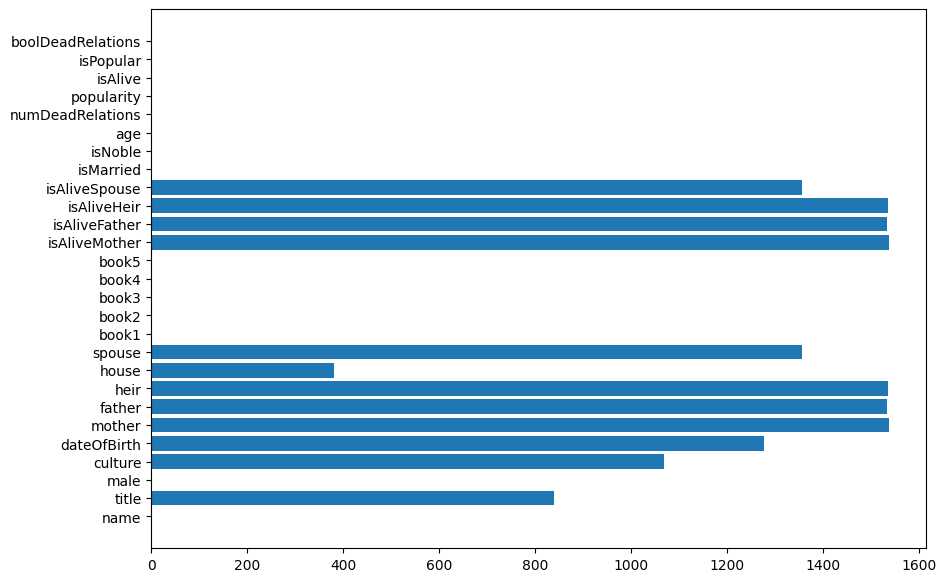

In [26]:
df = data.isna().sum()
plt.figure(figsize=(10,7))
plt.barh(df.index, df.values)

Колонки "mother", "father", "heir", "isAliveMother", "isAliveFather" и "isAliveHeir" имеют сравнительно мало данных. Удалим из набора данных эти столбцы, а вместо этих признаков добавим новый признак (relatives), который будет принимать значения 0 или 1 и указывать на наличие информации о родственниках данного персонажа. Признак "isMarried" также добавим в признак (relatives).

In [27]:
clmns_to_drop = ["mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried']


In [28]:
for i in clmns_to_drop:
  data.loc[(data[i].notnull()), ["relatives"]] = 1
data.loc[(data["relatives"].isnull()), ["relatives"]] = 0

In [29]:
data.loc[data.house.isnull(), ["house"]] = "UnknownHouse"
data.loc[data.title.isnull(), ["title"]] = "UnknownTitle"
data.loc[data.culture.isnull(), ["culture"]] = "UnknownCulture"
# заменим NaN в title, culture и house соответствующими значениями

#### Задание 1.5.
Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [30]:
data.drop(columns=clmns_to_drop, inplace = True)

In [31]:
# Имя для нас не существенный признак, удаляем
data.drop(columns='name', inplace = True)

In [32]:
# Так как этот призак дублирует возраст, мы его удаляем
data.drop(columns='dateOfBirth', inplace = True)

In [33]:
# Мы создали признак 'isPopular' поэтому можно удалить 'popularity'
data.drop(columns='popularity', inplace = True)

In [34]:
# Мы создали признак 'boolDeadRelations' поэтому можно удалить 'popularity'
data.drop(columns='numDeadRelations', inplace = True)

Проверяем, что пропущенных значений не осталось:

In [35]:
data.isna().sum()

,0
title,0
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isNoble,0


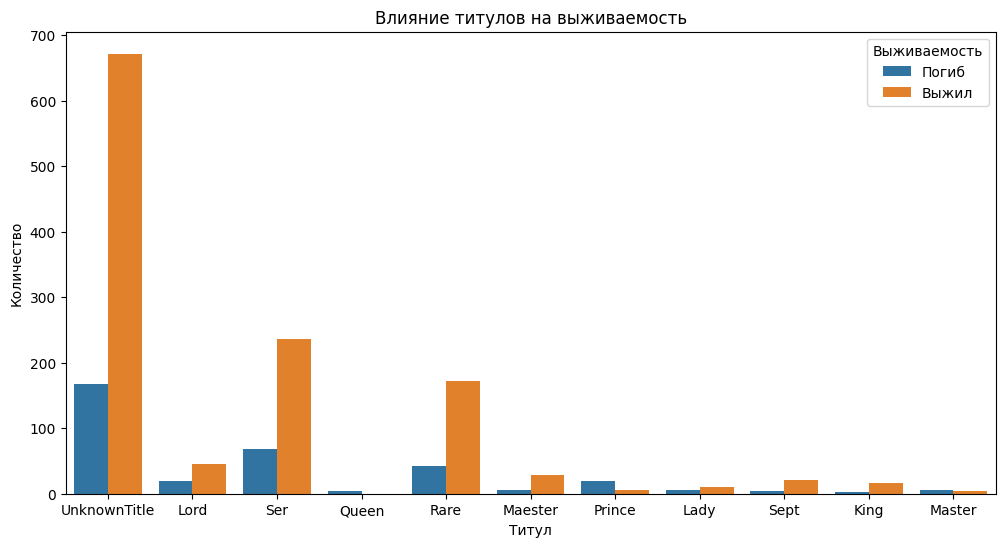

In [36]:
# Визуализация влияния титулов на выживаемость
plt.figure(figsize=(12, 6))

sns.countplot(x='title', hue='isAlive', data=data)

plt.title('Влияние титулов на выживаемость')

plt.xlabel('Титул')

plt.ylabel('Количество')

plt.legend(title='Выживаемость', loc='upper right', labels=['Погиб', 'Выжил'])

plt.show()


Можем заметить что у принцев высокая смертность, что конечно печально, но вполне вероятно. Больше тут группировать нечего. Идем дальше.

In [37]:
data

,title,male,culture,house,book1,book2,book3,book4,book5,isNoble,age,isAlive,isPopular,boolDeadRelations,relatives
S.No,,,,,,,,,,,,,,,
1,UnknownTitle,1,UnknownCulture,UnknownHouse,0,0,0,0,0,0,24.0,0,1.0,1,1.0
2,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,97.0,1,1.0,1,1.0
3,Ser,1,UnknownCulture,House Swyft,0,0,0,1,0,1,24.0,1,0.0,0,1.0
4,Queen,0,UnknownCulture,House Arryn,0,0,0,0,0,1,23.0,0,0.0,0,1.0
5,Rare,0,Dornish,House Santagar,0,0,0,1,0,1,29.0,1,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Rare,1,UnknownCulture,UnknownHouse,1,0,1,1,0,1,24.0,1,0.0,0,1.0
1554,UnknownTitle,0,UnknownCulture,UnknownHouse,1,1,0,0,0,0,24.0,0,0.0,0,1.0
1555,UnknownTitle,1,UnknownCulture,House Seaworth,0,1,1,1,1,0,24.0,0,0.0,0,1.0


Настала очередь признака 'house'. Для начала посмотрим, есть ли названия, которые мы можем сгруппировать.

In [38]:
# Получение количества уникальных значений в колонке 'house'
value_counts = data['house'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

house
Alchemists' Guild                            5
Antler Men                                   1
Band of Nine                                 1
Black Ears                                   1
Blacks                                       1
Brave Companions                             3
Brotherhood without banners                  4
Brotherhood Without Banners                  4
Burned Men                                   2
Chataya's brothel                            3
Citadel                                      1
City Watch of King's Landing                 1
Company of the Cat                           1
Drowned men                                  3
Faceless Men                                 1
Faith of the Seven                          15
Golden Company                               1
Good Masters                                 1
Happy Port                                   4
House Allyrion                               2
House Ambrose                                4
House A

In [39]:
# Объединим схожие названия
houses = {
    'Brotherhood without banners': ['Brotherhood without banners', 'Brotherhood Without Banners'],
    'Baratheon': ['House Baratheon', 'House Baratheon of Dragonstone', "House Baratheon of King's Landing"],
    'Brune': ["House Brune of Brownhollow", 'House Brune of the Dyre Den'],
    'Farwynd': ['House Farwynd', 'House Farwynd of the Lonely Light'],
    'Flint': ['House Flint', "House Flint of Widow's Watch"],
    'Fossoway': ['House Fossoway', 'House Fossoway of Cider Hall', 'House Fossoway of New Barrel'],
    'Frey': ['House Frey', 'House Frey of Riverrun'],
    'Goodbrother': ['House Goodbrother', 'House Goodbrother of Shatterstone'],
    'Harlaw': ['House Harlaw', 'House Harlaw of Grey Garden', 'House Harlaw of Harlaw Hall', 'House Harlaw of Harridan Hill', 'House Harlaw of the Tower of Glimmering'],
    'Kenning': ['House Kenning of Harlaw', 'House Kenning of Kayce'],
    'Lannister': [
        'House Lannister',
        'House Lannister of Casterly Rock',
        'House Lannister of Lannisport'
    ],
    'Royce': ['House Royce', 'House Royce of the Gates of the Moon'],
    'Vance': ['House Vance', 'House Vance of Atranta', "House Vance of Wayfarer's Rest"],
}

In [40]:
replace_dict = {name: simplified for simplified, names in houses.items() for name in names}
data['house'] = data['house'].replace(replace_dict)

# Получение количества уникальных значений в колонке 'house'
value_counts = data['house'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

house
Alchemists' Guild                   5
Antler Men                          1
Band of Nine                        1
Baratheon                          14
Black Ears                          1
Blacks                              1
Brave Companions                    3
Brotherhood without banners         8
Brune                               2
Burned Men                          2
Chataya's brothel                   3
Citadel                             1
City Watch of King's Landing        1
Company of the Cat                  1
Drowned men                         3
Faceless Men                        1
Faith of the Seven                 15
Farwynd                             4
Flint                               3
Fossoway                            6
Frey                               92
Golden Company                      1
Good Masters                        1
Goodbrother                         4
Happy Port                          4
Harlaw                              8
House 

In [41]:
data['house'] = data['house'].apply(lambda x: x if x in ["Alchemists' Guild", 'Baratheon', 'Brotherhood without banners', 'Faith of the Seven', 'Fossoway', 'House Arryn', 'House Ashford',
                                                           'House Baelish', 'Frey', 'Harlaw', 'House Beesbury', 'House Bolton', 'House Bolton', 'House Botley', 'House Bracken',
                                                           'House Brax', 'House Caswell', 'House Crakehall', 'House Darry', 'House Drumm', 'House Estermont', 'House Florent',
                                                        'House Greyjoy', 'House Haigh', 'House Hightower', 'House Hollard', 'House Karstark', 'House Mallister', 'House Martell',
                                                        'House Norcross', 'House of Loraq', 'House Osgrey', 'House Paege', 'House Plumm', 'House Redfort', 'House Redwyne',
                                                        'House Seaworth', 'House Stark', 'House Swann', 'House Tallhart', 'House Swyft', 'House Tully', 'House Tyrell',
                                                        'House Umber', 'House Velaryon', 'House Waynwood', 'House Webber', 'House Westerling', 'House Whent', 'House Wylde',
                                                        'Kingsguard', 'Lannister', "Night's Watch", 'Royce', 'Second Sons', 'Stone Crows', 'UnknownHouse', 'Vance'] else 'Rare')

In [42]:
# Получение количества уникальных значений в колонке 'house'
value_counts = data['house'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

house
Alchemists' Guild                5
Baratheon                       14
Brotherhood without banners      8
Faith of the Seven              15
Fossoway                         6
Frey                            92
Harlaw                           8
House Arryn                     11
House Ashford                    5
House Baelish                    6
House Beesbury                   6
House Bolton                     6
House Botley                    12
House Bracken                    9
House Brax                       8
House Caswell                    5
House Crakehall                 10
House Darry                      5
House Drumm                      6
House Estermont                  6
House Florent                   10
House Greyjoy                   30
House Haigh                      6
House Hightower                 12
House Hollard                    5
House Karstark                   5
House Mallister                  5
House Martell                   11
House Norcross

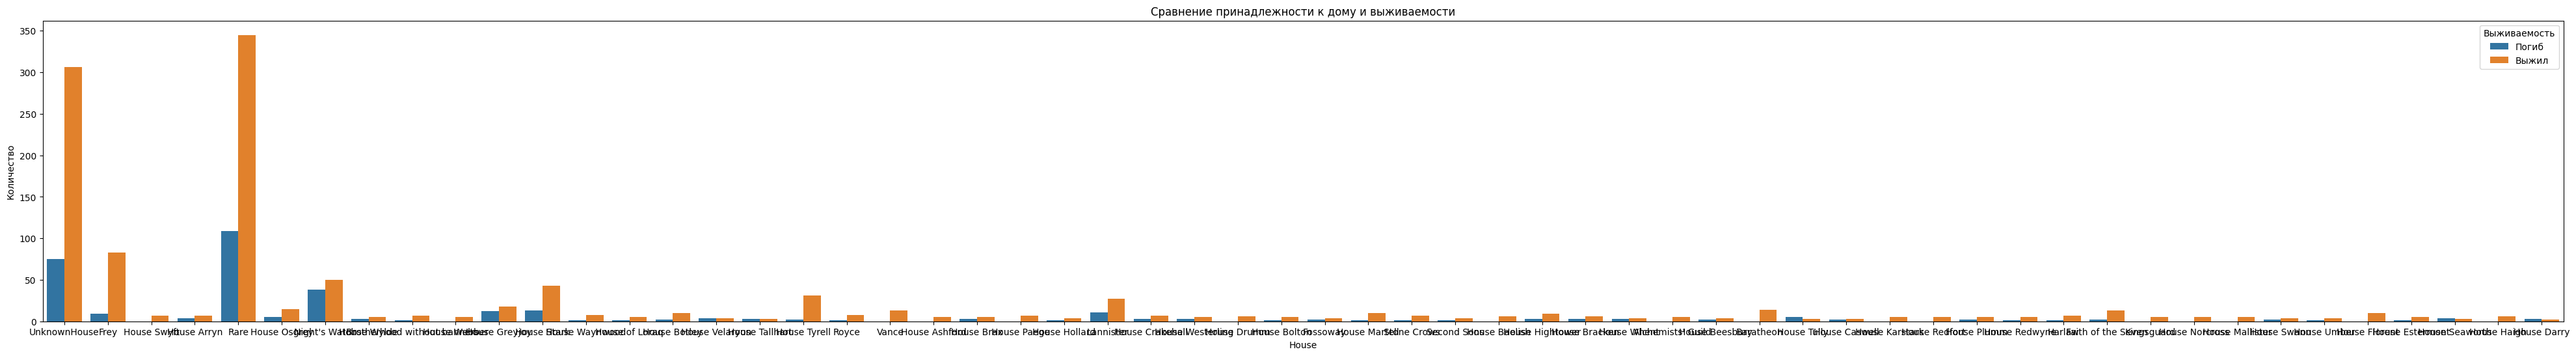

In [43]:
# Визуализация
plt.figure(figsize=(50, 6))
sns.countplot(x='house', hue='isAlive', data=data)

plt.title('Сравнение принадлежности к дому и выживаемости')

plt.xlabel('House')

plt.ylabel('Количество')

plt.legend(title='Выживаемость', loc='upper right', labels=['Погиб', 'Выжил'])

plt.show()

Видим на гистограмме - принадлежность к дому не сильно влияет на выживаемость. Считаю, что можем удалить этот признак.

In [44]:
data.drop(columns='house', inplace = True)

####Задание 1.6.
Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Целевая переменная "isAlive" является категориальной, так как она принимает значения выжил ли персонаж (1) или нет (0).
Для анализа сбалансированности классов необходимо проверить, равномерно ли распределены эти категории в датасете.

In [45]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


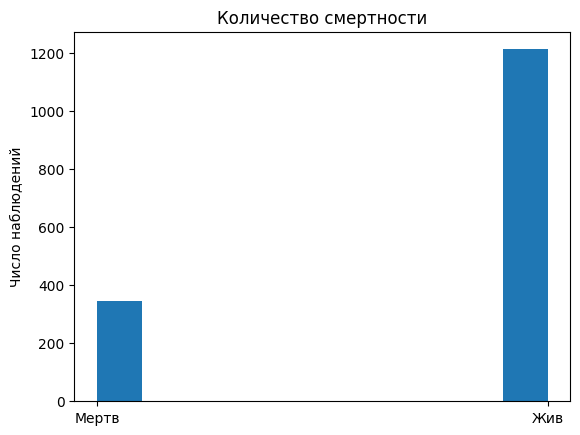

In [46]:
plt.hist(data['isAlive'])
plt.title('Количество смертности')
plt.ylabel('Число наблюдений')
plt.xticks([0, 1], ['Мертв', 'Жив'])  # Подписи для оси X
plt.show()

Видим на гистограмме, что класс (мертв) почти в 3 раза меньше класса (жив). Можно сказать, что датасет несбалансирован. Предлагаю построить ещё круговую диаграмму.

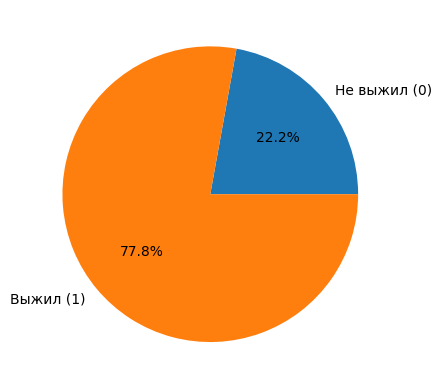

In [47]:
# Готовим данные для графика
data_alive = data['isAlive'].value_counts()

# Определение меток в правильном порядке
labels = ['Не выжил (0)', 'Выжил (1)']

# Сортируем по индексу (0 и 1)
data_alive = data_alive.sort_index()

# Строим круговую диаграмму
plt.pie(data_alive, labels=labels, autopct='%1.1f%%')

plt.show()

Мы можем не применять специальные метрики для балансировки целевой переменной, так как текущий дисбаланс можно считать 'мягким' (соотношение классов близко к 50/50 или меньшинство составляет 20-40% от общего числа). Однако важно периодически проверять производительность модели, чтобы убедиться, что она адекватно справляется с существующим дисбалансом, и быть готовыми к возможным корректировкам в будущем.



###Задание 1.7.
Проанализируйте признаки.

Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [48]:
data.columns

Index(['title', 'male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isNoble', 'age', 'isAlive', 'isPopular', 'boolDeadRelations',
       'relatives'],
      dtype='object')

Заведем список категориальных колонок:

In [49]:
categorical_columns = ['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5', 'title', 'isPopular', 'relatives', 'boolDeadRelations']

In [50]:
categorical_features = data[categorical_columns]

In [51]:
categorical_features.columns

Index(['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5', 'title',
       'isPopular', 'relatives', 'boolDeadRelations'],
      dtype='object')

Найдем среди категориальных колонок те, значения в которых не числовые:

In [52]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [53]:
unprocessed_cat_features

['culture', 'title']

In [54]:
data[unprocessed_cat_features]

,culture,title
S.No,,
1,UnknownCulture,UnknownTitle
2,Rivermen,Lord
3,UnknownCulture,Ser
4,UnknownCulture,Queen
5,Dornish,Rare
...,...,...
1553,UnknownCulture,Rare
1554,UnknownCulture,UnknownTitle
1555,UnknownCulture,UnknownTitle


In [55]:
from sklearn.preprocessing import OneHotEncoder

# Инициализируем OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Применяем one-hot кодирование к категориальным столбцам
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

# Создаём DataFrame с one-hot закодированными столбцами
# Используем get_feature_names_out() для получения названий столбцов
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index
                          )

In [56]:
one_hot_df

,culture_Braavosi,culture_Dornish,culture_Dothraki,culture_Free folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Rare,culture_Reach,culture_Rivermen,...,title_Lady,title_Lord,title_Maester,title_Master,title_Prince,title_Queen,title_Rare,title_Sept,title_Ser,title_UnknownTitle
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
# Объединяем датафрейм с one-hot кодировкой с исходным датафреймом
data_encoded = pd.concat([data, one_hot_df], axis=1)

# Удаляем исходные категориальные столбцы
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

# Отображаем результирующий датафрейм
data_encoded

,male,book1,book2,book3,book4,book5,isNoble,age,isAlive,isPopular,...,title_Lady,title_Lord,title_Maester,title_Master,title_Prince,title_Queen,title_Rare,title_Sept,title_Ser,title_UnknownTitle
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,24.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,1,1,1,1,1,97.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,1,24.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,1,23.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1,29.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,1,24.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1554,0,1,1,0,0,0,0,24.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,1,0,1,1,1,1,0,24.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
data_encoded.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isNoble', 'age',
       'isAlive', 'isPopular', 'boolDeadRelations', 'relatives',
       'culture_Braavosi', 'culture_Dornish', 'culture_Dothraki',
       'culture_Free folk', 'culture_Ghiscari', 'culture_Ironborn',
       'culture_Northmen', 'culture_Rare', 'culture_Reach', 'culture_Rivermen',
       'culture_Summer Islands', 'culture_Tyroshi', 'culture_UnknownCulture',
       'culture_Vale mountain clans', 'culture_Valemen', 'culture_Valyrian',
       'culture_Westermen', 'title_King', 'title_Lady', 'title_Lord',
       'title_Maester', 'title_Master', 'title_Prince', 'title_Queen',
       'title_Rare', 'title_Sept', 'title_Ser', 'title_UnknownTitle'],
      dtype='object')

In [59]:
numerical_columns = ['age']

In [60]:
num_features = data[numerical_columns]

print("Количество количественных признаков: ", len(num_features.columns))

Количество количественных признаков:  1


In [61]:
num_features

,age
S.No,
1,24.0
2,97.0
3,24.0
4,23.0
5,29.0
...,...
1553,24.0
1554,24.0
1555,24.0


Построим все возможные графики взаимных распределений всех признаков между собой:

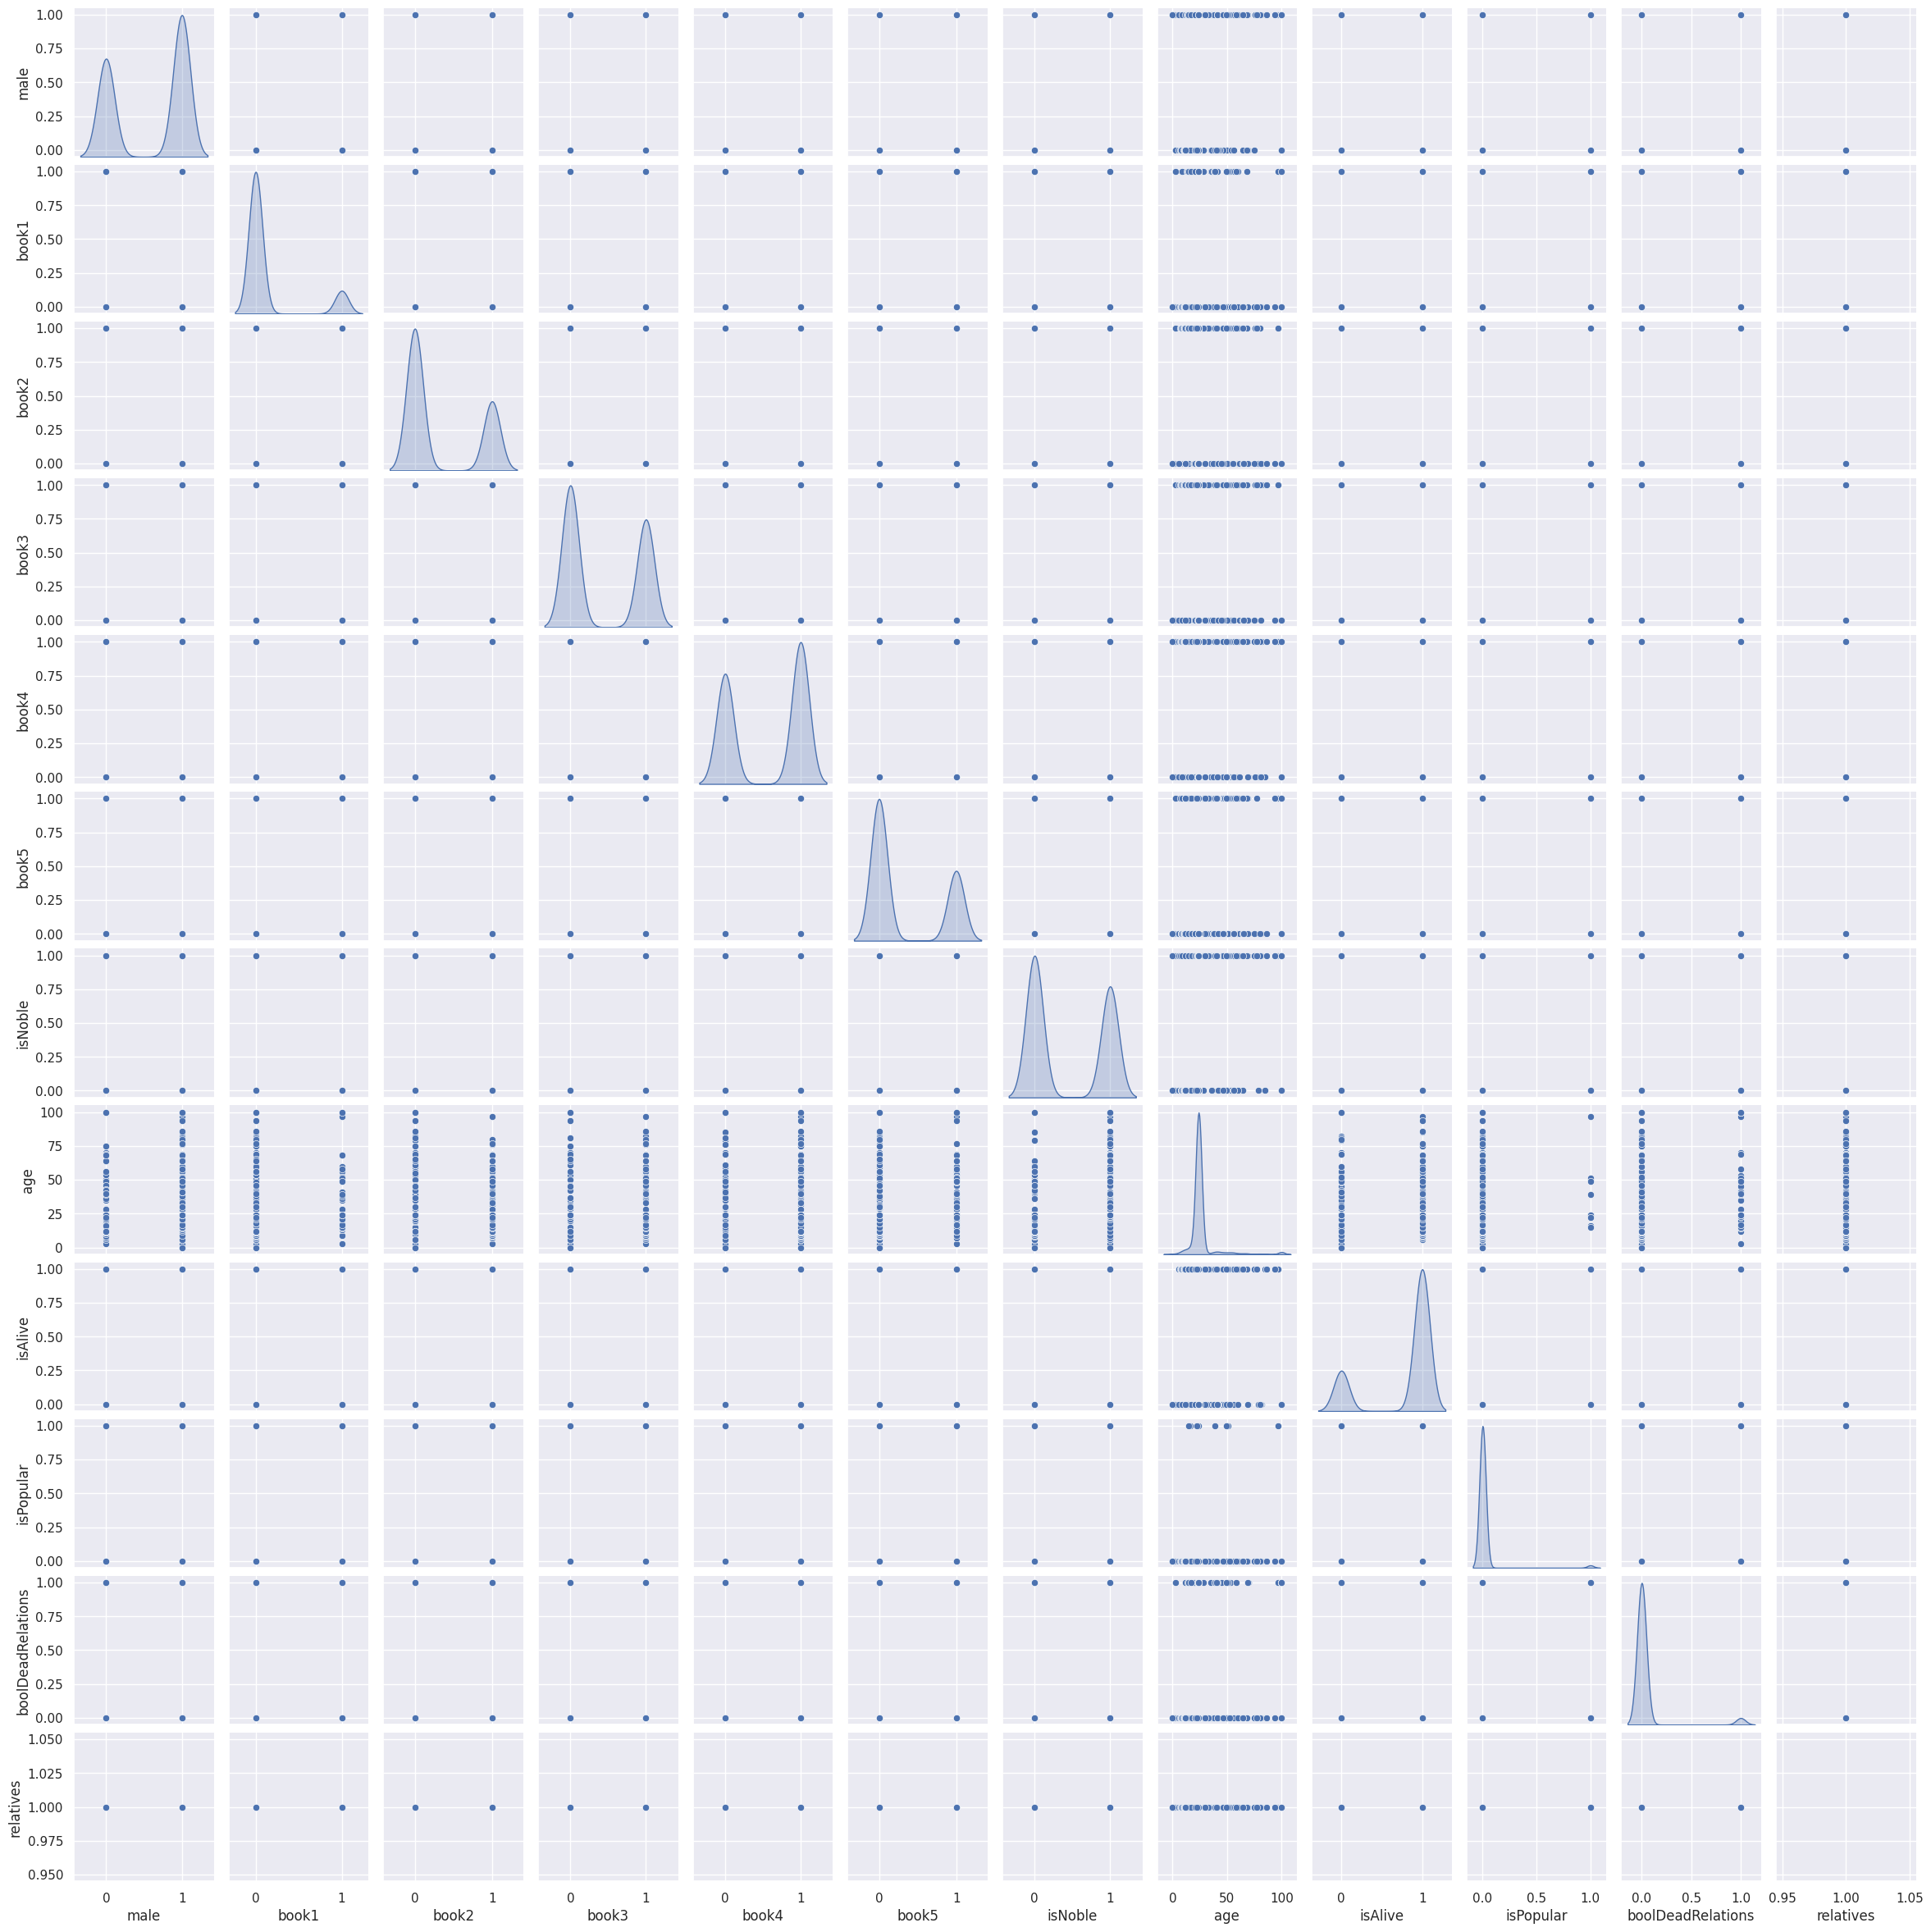

In [62]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Также давайте построим матрицу корреляций наших признаков.

Корреляция — мера линейной зависимости признаков друг от друга. Сильно скоррелированные признаки могут иметь негативный эффект на обучение линейных моделей. Если в датасете есть сильно скоррелированные признаки, и вы хотите использовать линейную модель машинного обучения, то от таких признаков нужно избавляться. Делать это можно несколькими способами:

Оставляя один из признаков
Соединив признак в один и создав новый признак
Сделать нелинейное преобразование признаков

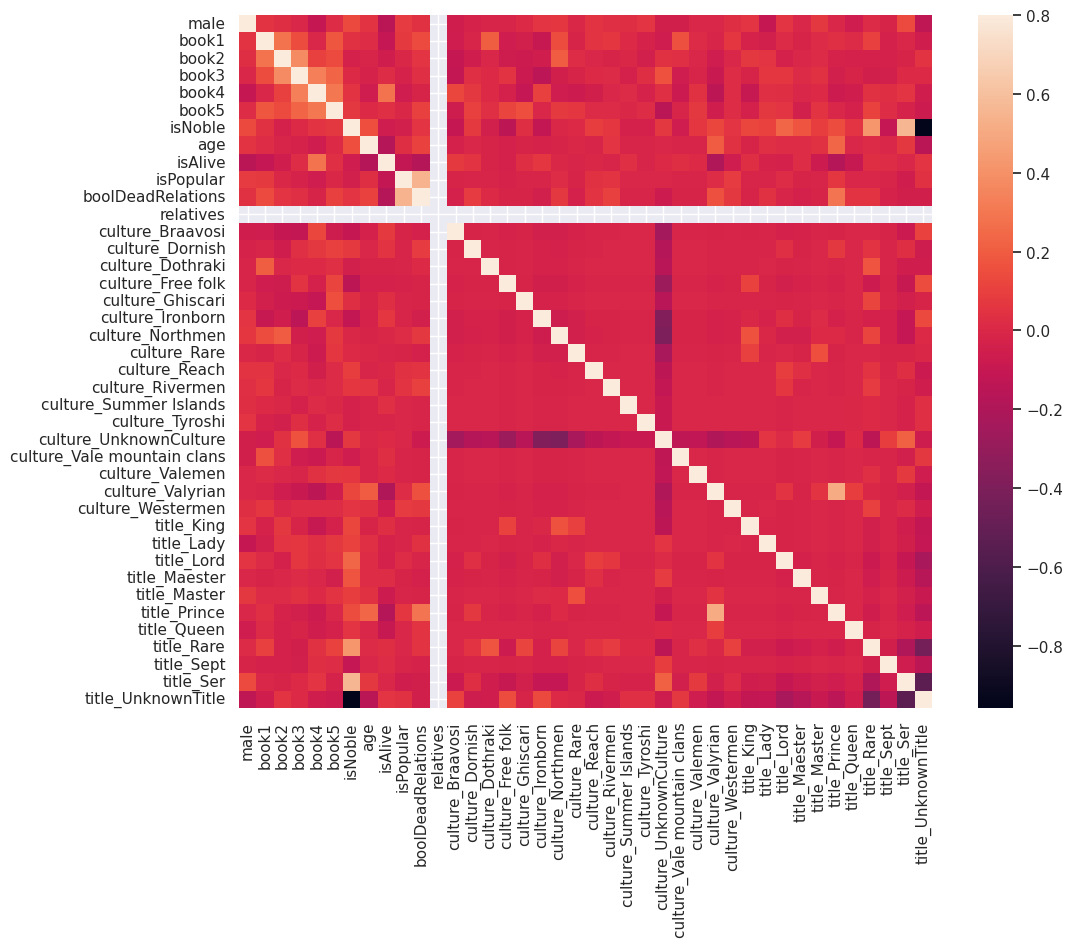

In [63]:
corrmat = data_encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Сделаем картинку чуть понятнее и красивее:

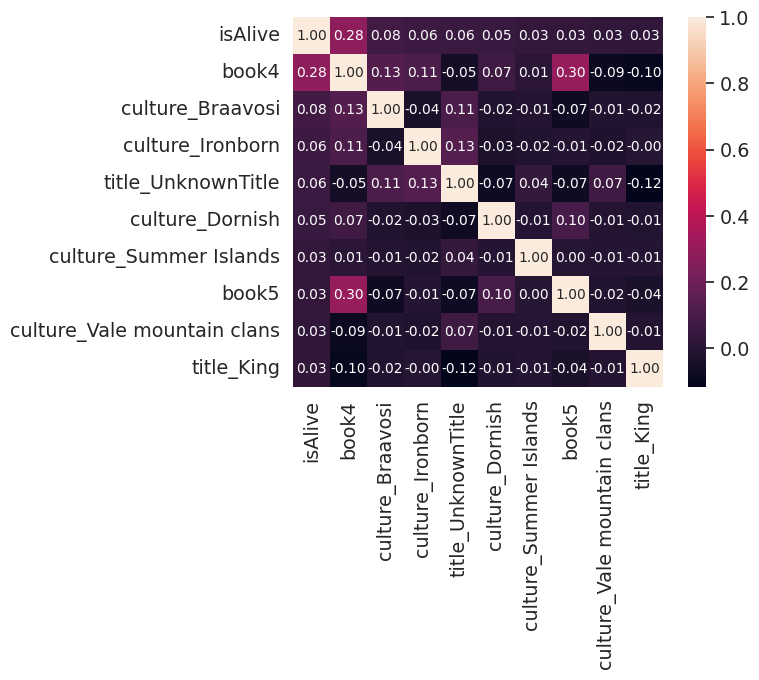

In [64]:
k = 10  # количество переменных для тепловой карты

# Выбираем k переменных, которые имеют наибольшую корреляцию с переменной 'isAlive'
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index

# Вычисляем корреляционную матрицу для выбранных переменных
# .values.T транспонирует массив, чтобы строки стали столбцами и наоборот
cm = np.corrcoef(data_encoded[cols].values.T)

# Устанавливаем масштаб шрифта для графиков
sns.set(font_scale=1.25)
# Создаем тепловую карту с помощью библиотеки seaborn
# cbar=True добавляет цветовую шкалу
# annot=True включает аннотации (значения корреляции) на тепловой карте
# square=True делает ячейки квадратными
# fmt='.2f' задает формат отображения значений (две цифры после запятой)
# annot_kws={'size': 10} задает размер шрифта для аннотаций
# yticklabels и xticklabels задают метки для осей y и x соответственно
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


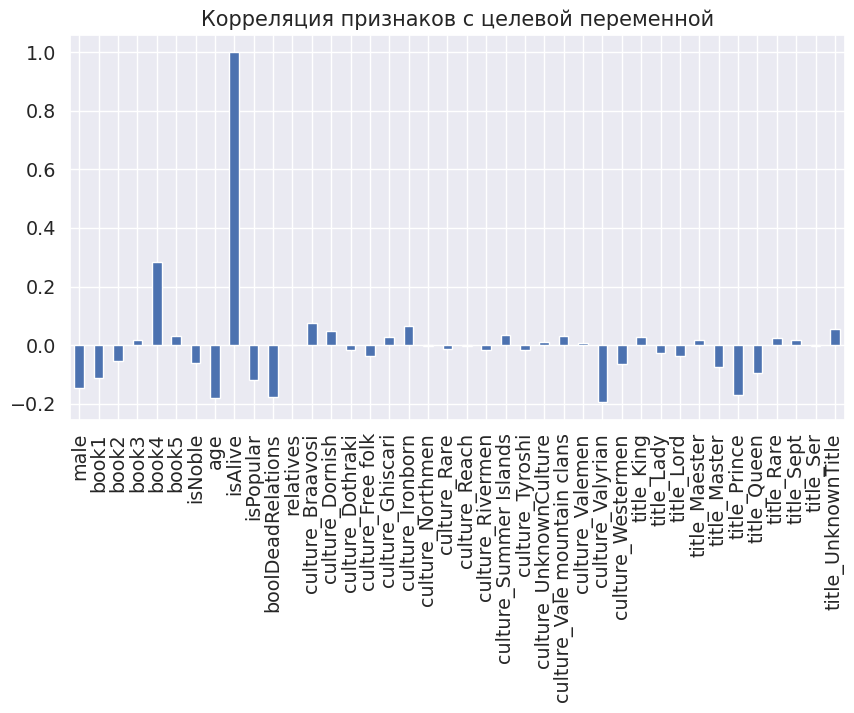

In [65]:
correlation_with_target = data_encoded.corrwith(data['isAlive'])

correlation_with_target.plot(kind='bar', figsize=(10, 5), title='Корреляция признаков с целевой переменной')
plt.show()

Получается, когда мы смотрим на матрицу корреляций, нам важно следующее:


*   Хорошо, если целевая переменная и признак коррелируют. Значит, есть понятная зависимость между ответом и признаком;
*   Плохо, если признаки коррелируют между собой.

На нашей матрице корреляций мы не видим чтобы признаки значительно коррелировали между собой, значит мы можем спокойно использовать их для обучения.


Задание 1.8. Проанализируйте влияние признаков на целевую переменную.

Попробуем ответить на следующие вопросы:

*   Какие люди выживали чаще всего?
*   Влияли ли пол и возраст на степень выживаемости?
*   Влияло ли наличие семьи на степень выживаемости?

Итак, какие люди выживали чаще всего?

Давайте нарисуем круговую диаграмму выживших в зависимости от того, в какой книге появился персонаж.

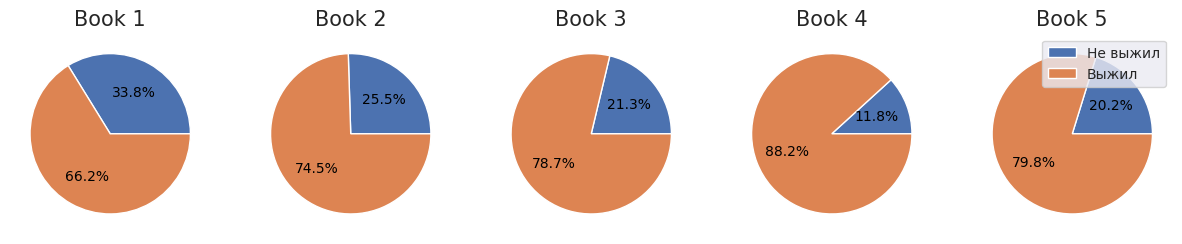

In [66]:
# Готовим данные для графика
data1 = data_encoded[data_encoded['book1'] == 1]['isAlive'].value_counts()
data2 = data_encoded[data_encoded['book2'] == 1]['isAlive'].value_counts()
data3 = data_encoded[data_encoded['book3'] == 1]['isAlive'].value_counts()
data4 = data_encoded[data_encoded['book4'] == 1]['isAlive'].value_counts()
data5 = data_encoded[data_encoded['book5'] == 1]['isAlive'].value_counts()

# Убедимся, что порядок значений соответствует меткам
data1 = data1.sort_index()
data2 = data2.sort_index()
data3 = data3.sort_index()
data4 = data4.sort_index()
data5 = data5.sort_index()


# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 8))

# Задаем свойства текста для процентов
text_props = {'fontsize': 10, 'color': 'black'}

ax1.pie(data1.values, autopct='%1.1f%%', textprops=text_props)
ax2.pie(data2.values, autopct='%1.1f%%', textprops=text_props)
ax3.pie(data3.values, autopct='%1.1f%%', textprops=text_props)
ax4.pie(data4.values, autopct='%1.1f%%', textprops=text_props)
ax5.pie(data5.values, autopct='%1.1f%%', textprops=text_props)

ax1.set_title("Book 1")
ax2.set_title("Book 2")
ax3.set_title("Book 3")
ax4.set_title("Book 4")
ax5.set_title("Book 5")

plt.legend(['Не выжил', 'Выжил'], loc='upper right', prop={'size': 10})

plt.show()

Мы видим, что персонажи, которые появились в первой книге имеют больший процент смертности, чем в других книгах. Но  ~10% - существенно ли это? Думаю, пока лучше оставить эти данные.

Так как "Is noble" - Знатность персонажа, основанное на титуле, то можем посмотреть как этот признак влияет на выживаемость персонажей

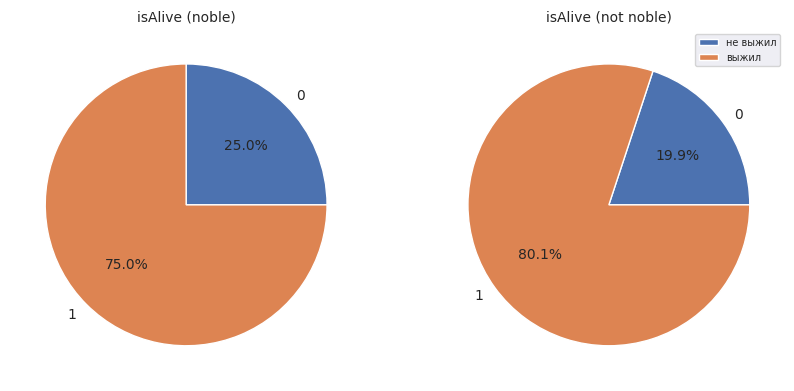

In [67]:
# not noble - 0, noble - 1
data_1 = data_encoded[data_encoded['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = data_encoded[data_encoded['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (noble)', fontsize=10)
ax2.set_title('isAlive (not noble)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Так как признак 'isNoble' незначительно влияет на выживаемость, можем его убрать.

In [68]:
data_encoded.drop(columns='isNoble', inplace = True)

Влияли ли пол и возраст на степень выживаемости?

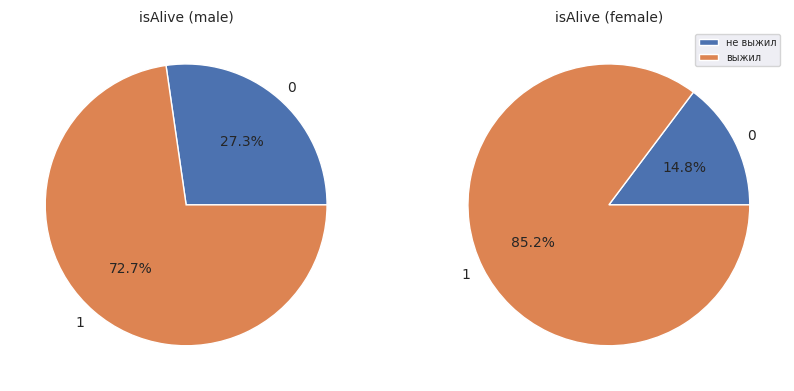

In [69]:
# female - 0, male - 1
data_1 = data_encoded[data_encoded['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data_encoded[data_encoded['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (male)', fontsize=10)
ax2.set_title('isAlive (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Можно заметить, что среди женщин процент выживших был немного больше.

Рассмотрим зависимость смертности от возраста на диаграмме рассеяния (Scatter Plot)

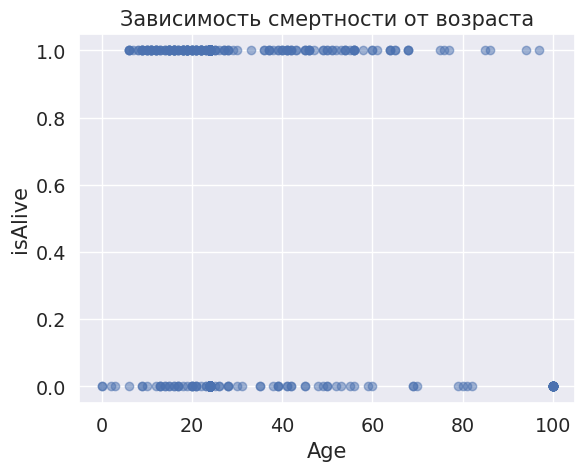

In [70]:
plt.scatter(data_encoded['age'], data_encoded['isAlive'], alpha=0.5)  # alpha задает прозрачность точек
plt.title('Зависимость смертности от возраста')
plt.xlabel('Age')
plt.ylabel('isAlive')
plt.show()

In [71]:
# Готовим данные для графика
data1 = data_encoded['age'][data_encoded['isAlive'] == 0]
data2 = data_encoded['age'][data_encoded['isAlive'] == 1]
data1.head()

,age
S.No,
1,24.0
4,23.0
7,26.0
8,24.0
9,24.0


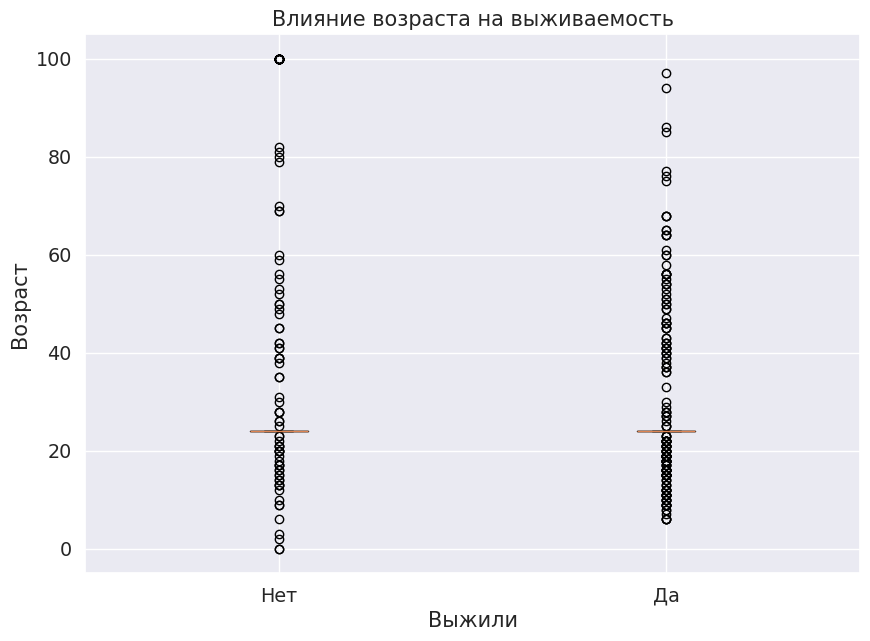

In [72]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние возраста на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Возраст')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

Задание 1.9. Создайте переменные X, которая будет хранить только значения признаков, и y, которая будет хранить только значения целевой переменной.

In [73]:
X = data_encoded.drop(['isAlive'], axis=1).values
y = data_encoded['isAlive'].values

In [74]:
data_encoded.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'age', 'isAlive',
       'isPopular', 'boolDeadRelations', 'relatives', 'culture_Braavosi',
       'culture_Dornish', 'culture_Dothraki', 'culture_Free folk',
       'culture_Ghiscari', 'culture_Ironborn', 'culture_Northmen',
       'culture_Rare', 'culture_Reach', 'culture_Rivermen',
       'culture_Summer Islands', 'culture_Tyroshi', 'culture_UnknownCulture',
       'culture_Vale mountain clans', 'culture_Valemen', 'culture_Valyrian',
       'culture_Westermen', 'title_King', 'title_Lady', 'title_Lord',
       'title_Maester', 'title_Master', 'title_Prince', 'title_Queen',
       'title_Rare', 'title_Sept', 'title_Ser', 'title_UnknownTitle'],
      dtype='object')

Задание 1.10. Разделите датасет на train и test часть при помощи функции train_test_split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=44)

**Масштабирование данных**

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
print('До масштабирования: ',X_train_scaled.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [-2.03407126e-16  1.11022302e-16 -1.89585072e-16 -3.21028344e-18
  2.57892770e-16 -6.81293487e-17  3.37436460e-16 -3.68825898e-16
 -4.51624458e-16  0.00000000e+00  1.84635885e-16 -1.86218733e-16
  3.49029150e-16  2.80788333e-16  8.43814086e-17 -1.21054438e-16
 -1.27073720e-16 -2.62351497e-16 -4.74430847e-16  1.19427003e-16
  3.77007662e-16  1.07756285e-16  3.58303302e-16  4.29754403e-16
  2.08913654e-16 -1.96094814e-16  8.32890205e-17 -4.55146853e-16
 -2.37449507e-16  3.74533069e-17 -3.68825898e-16 -1.87645526e-16
  3.77163717e-16  4.48001743e-16 -1.68985754e-16  5.32973933e-16
  8.39132423e-17 -8.48941622e-17]
После масштабирования:  [-2.03407126e-16  1.11022302e-16 -1.89585072e-16 -3.21028344e-18
  2.57892770e-16 -6.81293487e-17  3.37436460e-16 -3.68825898e-16
 -4.51624458e-16  0.00000000e+00  1.84635885e-16 -1.86218733e-16
  3.49029150e-16  2.80788333e-16  8.43814086e-17 -1.21054438e-16
 -1.27073720e-16 -2.62351497e-16 -4.74430847e-16  1.19427003e-16
  3.7700766

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [5.95180723e-01 1.37349398e-01 3.26907631e-01 4.32128514e-01
 5.57429719e-01 3.32530120e-01 2.58690763e+01 1.60642570e-02
 4.17670683e-02 1.00000000e+00 2.73092369e-02 1.28514056e-02
 1.04417671e-02 3.29317269e-02 1.44578313e-02 5.62248996e-02
 6.90763052e-02 2.24899598e-02 9.63855422e-03 7.22891566e-03
 4.01606426e-03 2.40963855e-03 6.87550201e-01 6.42570281e-03
 6.42570281e-03 1.92771084e-02 1.12449799e-02 1.20481928e-02
 8.83534137e-03 4.41767068e-02 2.16867470e-02 7.22891566e-03
 1.84738956e-02 2.40963855e-03 1.42168675e-01 1.52610442e-02
 1.98393574e-01 5.29317269e-01]
После масштабирования:  [0.59518072 0.1373494  0.32690763 0.43212851 0.55742972 0.33253012
 0.25869076 0.01606426 0.04176707 0.         0.02730924 0.01285141
 0.01044177 0.03293173 0.01445783 0.0562249  0.06907631 0.02248996
 0.00963855 0.00722892 0.00401606 0.00240964 0.6875502  0.0064257
 0.0064257  0.01927711 0.01124498 0.01204819 0.00883534 0.04417671
 0.02168675 0.00722892 0.0184739  0.0024

In [82]:
X_train = X_train_scaled
X_test = X_test_scaled

**Часть 2. Обучение моделей**

Задание 2.1. Импортируйте следующие модели из библиотеки sklearn

LogisticRegression

RandomForestClassifier

AdaBoostClassifier

GaussianProcessClassifier

GaussianNB

KNeighborsClassifier

SVC

DecisionTreeClassifier


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier

Задание 2.2. Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель LogisticRegression и сделаем на ней предсказания на тестовой выборке.

In [84]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = logistic_regression.predict(X_train)
pred_test = logistic_regression.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.19
MSE на тесте 0.19

RMSE на обучении 0.44
RMSE на тесте 0.44

R2 на обучении -0.10
R2 на тесте -0.12

MAE на обучении 0.19
MAE на тесте 0.19



In [86]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [87]:
pred_train = model_rf.predict(X_train)
pred_test = model_rf.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.09
MSE на тесте 0.20

RMSE на обучении 0.30
RMSE на тесте 0.45

R2 на обучении 0.46
R2 на тесте -0.15

MAE на обучении 0.09
MAE на тесте 0.20



In [88]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)

In [89]:
pred_train = model_ada.predict(X_train)
pred_test = model_ada.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.20
MSE на тесте 0.20

RMSE на обучении 0.45
RMSE на тесте 0.44

R2 на обучении -0.15
R2 на тесте -0.14

MAE на обучении 0.20
MAE на тесте 0.20



In [90]:
model_gaussian = GaussianProcessClassifier()
model_gaussian.fit(X_train, y_train)
y_pred = model_gaussian.predict(X_test)

In [91]:
pred_train = model_gaussian.predict(X_train)
pred_test = model_gaussian.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.17
MSE на тесте 0.20

RMSE на обучении 0.41
RMSE на тесте 0.45

R2 на обучении 0.04
R2 на тесте -0.15

MAE на обучении 0.17
MAE на тесте 0.20



In [92]:
model_gausianNB = GaussianNB()
model_gausianNB.fit(X_train, y_train)
y_pred = model_gausianNB.predict(X_test)

In [93]:
pred_train = model_gausianNB.predict(X_train)
pred_test = model_gausianNB.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.24
MSE на тесте 0.26

RMSE на обучении 0.49
RMSE на тесте 0.51

R2 на обучении -0.39
R2 на тесте -0.49

MAE на обучении 0.24
MAE на тесте 0.26



In [96]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.17
MSE на тесте 0.26

RMSE на обучении 0.41
RMSE на тесте 0.51

R2 на обучении 0.03
R2 на тесте -0.53

MAE на обучении 0.17
MAE на тесте 0.26



In [97]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [98]:
pred_train = model_svc.predict(X_train)
pred_test = model_svc.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.17
MSE на тесте 0.19

RMSE на обучении 0.42
RMSE на тесте 0.43

R2 на обучении -0.00
R2 на тесте -0.08

MAE на обучении 0.17
MAE на тесте 0.19



In [99]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)
y_pred = model_dt.predict(X_test)

In [100]:
pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.09
MSE на тесте 0.25

RMSE на обучении 0.30
RMSE на тесте 0.50

R2 на обучении 0.46
R2 на тесте -0.43

MAE на обучении 0.09
MAE на тесте 0.25



***Часть 3. Оцените качество моделей***

Задание 3.1. Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [101]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели LogisticRegression

In [102]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


Аналогичным образом посчитайте метрику accuracy для остальных моделей

RandomForestClassifier

In [103]:
# Предсказание на тестовых данных
y_pred = model_rf.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


AdaBoostClassifier

In [104]:
# Предсказание на тестовых данных
y_pred = model_ada.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


GaussianProcessClassifier

In [105]:
# Предсказание на тестовых данных
y_pred = model_gaussian.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


GaussianNB

In [106]:
# Предсказание на тестовых данных
y_pred = model_gausianNB.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7436


KNeighborsClassifier

In [107]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7372


SVC

In [108]:
# Предсказание на тестовых данных
y_pred = model_svc.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


DecisionTreeClassifier

In [109]:
# Предсказание на тестовых данных
y_pred = model_dt.predict(X_test)

# Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7532


Лучшей моделью для данной задачи оказалась SVC (Support Vector Classifier) c Accuracy : 0.8141

**Файл submission.csv**

Вам нужно вместо значений в submission.csv файле в колонке isAlive, подставить свои предсказания и сохранить измененный файл.

In [110]:
submission = pd.read_csv('https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF', index_col="S.No")

In [111]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Берем тестовые данные для них делаем те же самые манипуляции и прогоняем на лучшей модели

In [112]:
test_data = pd.read_csv('https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3', index_col="S.No")

In [113]:
test_data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [114]:
clmns_to_drop = ['dateOfBirth', 'name', "mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'house', 'isNoble']

In [115]:
for i in clmns_to_drop:
  test_data.loc[(test_data[i].notnull()), ["relatives"]] = 1
test_data.loc[(test_data["relatives"].isnull()), ["relatives"]] = 0

In [116]:
mean_Age = np.mean(test_data['age'].dropna().values)
median_Age = np.quantile(test_data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = -3701.0324675324673
Медиана = 32.0


In [117]:
# Заполнение нулевых значений медианой с использованием loc
test_data.loc[test_data['age'].isnull(), 'age'] = median_Age

In [118]:
# создаем признак isPopular
test_data.loc[test_data["popularity"] > 0.5, ["isPopular"]] = 1
test_data.loc[test_data["isPopular"].isnull(), ["isPopular"]] = 0  # всем NaN в столбце isPopular присваиваем 0

In [119]:
# Мы создали признак 'isPopular' поэтому можно удалить 'popularity'
test_data.drop(columns='popularity', inplace = True)

In [120]:
# создаем признак boolDeadRelations
test_data["boolDeadRelations"] = 0  # Инициализируем признак значением 0
test_data.loc[test_data["numDeadRelations"] > 0, "boolDeadRelations"] = 1  # Устанавливаем 1, если есть отношения с мертвыми

In [121]:
# Мы создали признак 'boolDeadRelations' поэтому можно удалить 'popularity'
test_data.drop(columns='numDeadRelations', inplace = True)

In [122]:
test_data.drop(columns=clmns_to_drop, inplace = True)

In [123]:
test_data.columns

Index(['title', 'male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'age', 'relatives', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [124]:
# Объединим схожие названия в столбце 'culture'
cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Andal': ['Andal', 'Andals'],
    'Dornish': ['Dornish', 'Dorne',  'Dornishmen'],
    'Free folk': ["Free folk", 'Free Folk'],
    'Ironborn': ['Ironborn', 'ironborn', 'Ironmen'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Northmen': ['Northmen', 'Northern mountain clans'],
    'Valemen': ['Valemen', 'Vale', 'Valemen'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['Westerman', 'Westermen', 'Westeros', 'Westerlands'],
}

In [125]:
replace_dict = {name: simplified for simplified, names in cult.items() for name in names}
test_data['culture'] = test_data['culture'].replace(replace_dict)

# Получение количества уникальных значений в колонке 'culture'
value_counts = test_data['culture'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts)

culture
Asshai                  2
Asshai'i                1
Astapor                 1
Braavosi                3
Crannogmen              2
Dornish                20
Dothraki                6
First Men               1
Free folk              10
Ghiscari                8
Ibbenese                1
Ironborn               23
Lhazareen               1
Lysene                  4
Meereen                 1
Meereenese              1
Myrish                  1
Naathi                  1
Northmen               32
Norvos                  1
Pentoshi                2
Qartheen                1
Qohor                   1
Reach                   3
Reachmen                1
Rhoynar                 1
Riverlands              2
Rivermen                9
Stormlander             1
Stormlands              3
Summer Islands          1
The Reach               1
Tyroshi                 1
Vale mountain clans     3
Valemen                 9
Valyrian               15
Westermen              12
Wildling                1
Wild

In [126]:
test_data['culture'] = test_data['culture'].apply(lambda x: x if pd.isna(x) or x in ['Braavosi', 'Dornish', 'Dothraki', 'Free folk',
                                                           'Ghiscari', 'Ironborn', 'Northmen', 'Reach', 'Rivermen',
                                                           'Summer Islands', 'Tyroshi', 'Vale mountain clans', 'Valemen', 'Valyrian', 'Westermen'] else 'Rare')

In [127]:
value_counts = test_data['culture'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts)

culture
Braavosi                3
Dornish                20
Dothraki                6
Free folk              10
Ghiscari                8
Ironborn               23
Northmen               32
Rare                   34
Reach                   3
Rivermen                9
Summer Islands          1
Tyroshi                 1
Vale mountain clans     3
Valemen                 9
Valyrian               15
Westermen              12
Name: count, dtype: int64


In [128]:
# Получение количества уникальных значений в колонке 'title'
value_counts = test_data['title'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

title
[1]                                        1
Acorn Hall                                 1
Andals                                     2
Arbor                                      1
Barrowton                                  2
Bear Island                                1
Black Wind                                 1
Blacktyde                                  1
Bloodrider                                 3
Brightwater                                1
Captain-General                            1
Castellan                                  1
Castellan of Harrenhal                     1
Casterly Rock                              2
Coldmoat                                   1
Commander of the City Watch                1
Darry                                      1
Dreadfort                                  1
Eyrie                                      2
First Builder                              1
First Ranger                               2
Godswife                                   1
Gold

In [129]:
test_data['title'] = test_data['title'].str.replace(r'Prince.*', 'Prince', regex=True)
test_data['title'] = test_data['title'].str.replace(r'Lord.*', 'Lord', regex=True)
test_data['title'] = test_data['title'].str.replace(r'King.*', 'King', regex=True)
test_data['title'] = test_data['title'].str.replace(r'Queen.*', 'Queen', regex=True)
test_data['title'] = test_data['title'].str.replace(r'Lady.*', 'Lady', regex=True)
test_data['title'] = test_data['title'].str.replace(r'.*master.*', 'Master', regex=True)
test_data['title'] = test_data['title'].str.replace(r'.*Master.*', 'Master', regex=True)
test_data['title'] = test_data['title'].str.replace(r'Captain.*', 'Captain', regex=True)
test_data['title'] = test_data['title'].str.replace(r'.*Maester.*', 'Maester', regex=True)
test_data['title'] = test_data['title'].str.replace(r'.*Septon.*', 'Sept', regex=True)
test_data['title'] = test_data['title'].str.replace(r'.*Septa.*', 'Sept', regex=True)

In [130]:
test_data['title'] = test_data['title'].apply(lambda x: x if pd.isna(x) or x in ['Lady', 'Prince', 'Archmaester', 'Cupbearer',
                                                           'Maester', 'King', 'Lord', 'Master', 'Queen',
                                                           'Sept', 'Ser'] else 'Rare')

In [131]:
# Получение количества уникальных значений в колонке 'title'
value_counts = test_data['title'].value_counts()

# Сортировка по алфавиту (по индексам), игнорируя регистр
sorted_value_counts = value_counts.sort_index(key=lambda x: x.str.lower())

print(sorted_value_counts.to_string())

title
King        2
Lady        6
Lord       19
Maester    12
Master      3
Prince     14
Queen       1
Rare       82
Sept        4
Ser        78


In [132]:
test_data.loc[test_data.title.isnull(), ["title"]] = "UnknownTitle"
test_data.loc[test_data.culture.isnull(), ["culture"]] = "UnknownCulture"
# заменим NaN в title и culture соответствующими значениями

In [133]:
test_data

,title,male,culture,book1,book2,book3,book4,book5,age,relatives,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,
1558,UnknownTitle,0,UnknownCulture,0,0,0,0,1,100.0,1.0,0.0,0
1559,UnknownTitle,0,Rare,0,1,1,1,1,32.0,1.0,1.0,0
1560,UnknownTitle,0,UnknownCulture,0,0,1,1,0,32.0,1.0,0.0,0
1561,Ser,1,UnknownCulture,1,1,1,1,1,32.0,1.0,0.0,0
1562,UnknownTitle,1,Rare,1,1,1,1,1,38.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,UnknownTitle,1,Westermen,1,1,1,1,1,32.0,1.0,0.0,0
1943,UnknownTitle,1,UnknownCulture,0,1,0,1,1,32.0,1.0,0.0,0
1944,UnknownTitle,1,UnknownCulture,1,1,1,1,1,32.0,1.0,0.0,0


In [134]:
unprocessed_cat_features = ['title', 'culture']

# Применяем one-hot кодирование к категориальным столбцам
one_hot_encoded = encoder.fit_transform(test_data[unprocessed_cat_features])

# Создаём DataFrame с one-hot закодированными столбцами
# Используем get_feature_names_out() для получения названий столбцов
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=test_data.index
                          )

In [135]:
one_hot_data

,title_King,title_Lady,title_Lord,title_Maester,title_Master,title_Prince,title_Queen,title_Rare,title_Sept,title_Ser,...,culture_Rare,culture_Reach,culture_Rivermen,culture_Summer Islands,culture_Tyroshi,culture_UnknownCulture,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [136]:
test_data.columns

Index(['title', 'male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'age', 'relatives', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [137]:
# Объединяем датафрейм с one-hot кодировкой с исходным датафреймом
test_data = pd.concat([test_data, one_hot_data], axis=1)

# Удаляем исходные категориальные столбцы
test_data = test_data.drop(unprocessed_cat_features, axis=1)

# Отображаем результирующий датафрейм
test_data

,male,book1,book2,book3,book4,book5,age,relatives,isPopular,boolDeadRelations,...,culture_Rare,culture_Reach,culture_Rivermen,culture_Summer Islands,culture_Tyroshi,culture_UnknownCulture,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,100.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1559,0,0,1,1,1,1,32.0,1.0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,0,0,1,1,0,32.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1561,1,1,1,1,1,1,32.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1562,1,1,1,1,1,1,38.0,1.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,32.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1943,1,0,1,0,1,1,32.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1944,1,1,1,1,1,1,32.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [138]:
test_data.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'age', 'relatives',
       'isPopular', 'boolDeadRelations', 'title_King', 'title_Lady',
       'title_Lord', 'title_Maester', 'title_Master', 'title_Prince',
       'title_Queen', 'title_Rare', 'title_Sept', 'title_Ser',
       'title_UnknownTitle', 'culture_Braavosi', 'culture_Dornish',
       'culture_Dothraki', 'culture_Free folk', 'culture_Ghiscari',
       'culture_Ironborn', 'culture_Northmen', 'culture_Rare', 'culture_Reach',
       'culture_Rivermen', 'culture_Summer Islands', 'culture_Tyroshi',
       'culture_UnknownCulture', 'culture_Vale mountain clans',
       'culture_Valemen', 'culture_Valyrian', 'culture_Westermen'],
      dtype='object')

In [139]:
#scaler.fit(test_data)

#scaled = scaler.transform(test_data)

In [140]:
y_pred_best = model_svc.predict(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [141]:
submission["isAlive"]= y_pred_best

 Сохранияем измененный Pandas DataFrame в csv файл:

In [142]:
submission.to_csv("/content/new_submission.csv", index=False)

In [143]:
   from google.colab import files
   files.download('/content/new_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>